In [2]:
import jax
import jax.numpy as jnp

import Project_library as pl

import numpy as np



import matplotlib.pyplot as plt


In [3]:
# Lets intialize the users with some random demand.

users_states = jax.random.bernoulli(jax.random.PRNGKey(0), p=0.5, shape=(8,)).astype(jnp.int32)

alpha = 0.9
beta = 0.4


A = jnp.array([[1-alpha, alpha]
              ,[beta, 1-beta]])

# Then lets emulate the transition to the next state and record the changes and then compute the histogram of the changes. So that I can test the attempt at prediction

time_series = jnp.zeros((users_states.shape[0],2))

key = jax.random.PRNGKey(0)

key = jax.random.split(key, (users_states.shape[0],))

pl.users_state_change(A, users_states, time_series, key)

Array([[0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 1]], dtype=int32)

In [4]:
number_of_realizations = 1000

key = jax.random.PRNGKey(0)


users_states = jnp.array([[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[1,1,0,0,0,0,0,0],[1,1,1,0,0,0,0,0],[0,0,0,0,1,1,1,1],[1,1,1,1,1,0,0,0], [1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0],  [1,1,1,1,1,1,1,1]]) 

intial_sum = jnp.sum(users_states)

print(intial_sum)

outcome = jnp.zeros((users_states.shape[0],users_states.shape[1]+1))

# Now I want to run the simulation for a number of realizations with the same initial state
for k in range(outcome.shape[0]):
    print(users_states[k])
    for i in range(number_of_realizations):
        key = jax.random.split(key, (users_states.shape[1],))
        time_series = pl.users_state_change(A, users_states[k], time_series, key)
        # Okay now i sum up the time series for each time step 
        outcome = outcome.at[k,jnp.sum(time_series, axis=0)[1]].add(1)
        key = key[0]
    print(outcome[k])

print(outcome)
# Make a bar plot of the outcome normalized by the number of realizations
for i in range(outcome.shape[0]):
    plt.bar(jnp.arange(outcome.shape[1]), outcome[i]/number_of_realizations, label=f'state {i}')

plt.legend()
plt.xlabel('Number of users in state 1')
plt.ylabel('Probability')
plt.title(f'Probability of users in state 1 after 1 time step given varying initial statse')
plt.show()

36
[0 0 0 0 0 0 0 0]
[  0.   0.   0.   1.   7.  27. 153. 390. 422.]
[1 0 0 0 0 0 0 0]
[  0.   0.   1.   0.  14.  63. 219. 418. 285.]
[1 1 0 0 0 0 0 0]
[  0.   0.   0.   2.  26.  93. 275. 401. 203.]
[1 1 1 0 0 0 0 0]


KeyboardInterrupt: 

36
[0 0 0 0 0 0 0 0]
[1.000e+00 1.600e+01 1.190e+02 5.020e+02 1.437e+03 2.589e+03 2.943e+03
 1.939e+03 4.540e+02]
[1 0 0 0 0 0 0 0]
[2.000e+00 1.600e+01 1.100e+02 5.010e+02 1.446e+03 2.610e+03 2.909e+03
 1.886e+03 5.200e+02]
[1 1 0 0 0 0 0 0]
[   0.    8.  115.  532. 1443. 2623. 2883. 1872.  524.]
[1 1 1 0 0 0 0 0]
[   0.   17.  101.  484. 1511. 2615. 2957. 1814.  501.]
[0 0 0 0 1 1 1 1]
[1.000e+00 1.400e+01 1.140e+02 4.920e+02 1.413e+03 2.614e+03 2.944e+03
 1.869e+03 5.390e+02]
[1 1 1 1 1 0 0 0]
[2.000e+00 1.400e+01 1.200e+02 5.090e+02 1.482e+03 2.573e+03 2.906e+03
 1.886e+03 5.080e+02]
[1 1 1 1 1 1 0 0]
[1.000e+00 1.000e+01 1.220e+02 4.940e+02 1.473e+03 2.563e+03 2.961e+03
 1.858e+03 5.180e+02]
[1 1 1 1 1 1 1 0]
[   0.   19.  112.  513. 1466. 2544. 2943. 1872.  531.]
[1 1 1 1 1 1 1 1]
[   0.   10.  115.  491. 1447. 2571. 2914. 1864.  588.]
[[1.000e+00 1.600e+01 1.190e+02 5.020e+02 1.437e+03 2.589e+03 2.943e+03
  1.939e+03 4.540e+02]
 [2.000e+00 1.600e+01 1.100e+02 5.010e+02 1.446e+03

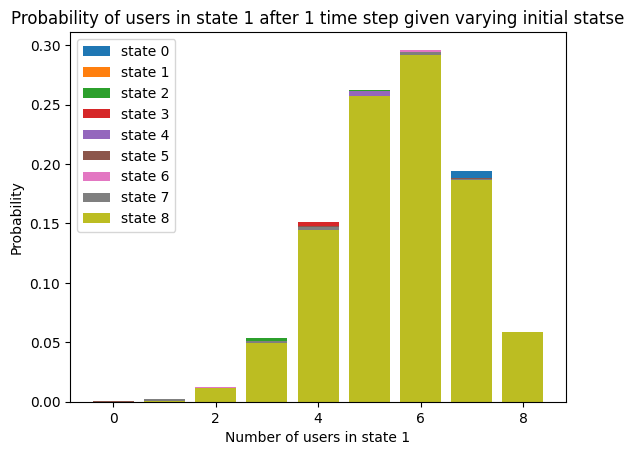

In [5]:
number_of_realizations = 1000

key = jax.random.PRNGKey(0)


users_states = jnp.array([[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[1,1,0,0,0,0,0,0],[1,1,1,0,0,0,0,0],[0,0,0,0,1,1,1,1],[1,1,1,1,1,0,0,0], [1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0],  [1,1,1,1,1,1,1,1]]) 

intial_sum = jnp.sum(users_states)

print(intial_sum)

outcome = jnp.zeros((users_states.shape[0],users_states.shape[1]+1))

time_series = jnp.zeros((users_states.shape[1],10))


# Now I want to run the simulation for a number of realizations with the same initial state
for k in range(outcome.shape[0]):
    print(users_states[k])
    for i in range(number_of_realizations):
        key = jax.random.split(key, (users_states.shape[1],))
        time_series = pl.users_state_change(A, users_states[k], time_series, key)
        # Okay now i sum up the time series for each time step 
        outcome = outcome.at[k,jnp.sum(time_series, axis=0)[9]].add(1)
        key = key[0]
    print(outcome[k])

print(outcome)
# Make a bar plot of the outcome normalized by the number of realizations
for i in range(outcome.shape[0]):
    plt.bar(jnp.arange(outcome.shape[1]), outcome[i]/number_of_realizations, label=f'state {i}')

plt.legend()
plt.xlabel('Number of users in state 1')
plt.ylabel('Probability')
plt.title(f'Probability of users in state 1 after 1 time step given varying initial statse')
plt.show()

In [6]:
# Okay lets try and make this based on probablity theory.
# Okay so have a number of users

users_states = jnp.array([[0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0],[1,1,0,0,0,0,0,0],[1,1,1,0,0,0,0,0],[0,0,0,0,1,1,1,1],[1,1,1,1,1,0,0,0], [1,1,1,1,1,1,0,0],[1,1,1,1,1,1,1,0],  [1,1,1,1,1,1,1,1]]) 

# Okay lets calculate the probability distribution after one time step
jnp.sum(users_states, axis=1)

# Two binomial distributions, so 

Array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

<BarContainer object of 9 artists>

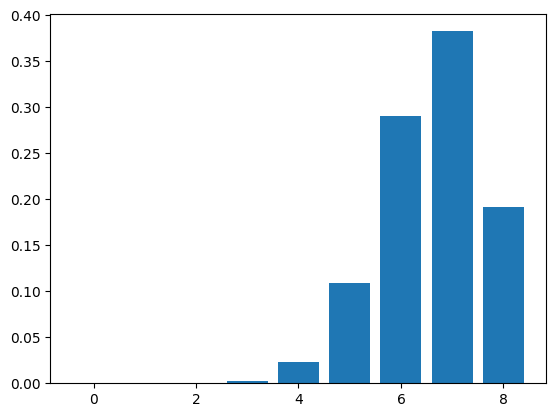

In [ ]:
# inputs:
#   s = [s1, s2, ..., s8]      # 0 or 1
#   alpha = [α1, ..., α8]
#   beta  = [β1, ..., β8]

s = [1, 1, 0, 0,0,0,0,0 ]

# 1. compute p_i for each chain
p = [ s[i]*(1-beta) + (1-s[i])*alpha for i in range(8) ]

# 2. init DP array
f = [0]*9
f[0] = 1.0

# 3. iterate chains
for pi in p:
    # update from k=8 down to 0
    for k in range(8, -1, -1):
        
        stay_off = f[k] * (1 - pi)
        turn_on  = f[k-1] * pi if k > 0 else 0
        f[k] = stay_off + turn_on

# now f[k] is Pr{ exactly k chains are on }
plt.bar(jnp.arange(9), f)

In [ ]:
# Okay lets just see what is the expected value of f 
print(jnp.sum(jnp.arange(9)*jnp.array(f)))

print(jnp.arange(9)[jnp.argmax(jnp.array(f))])

# Well how would you include this into the optimization problem.

6.6000004
7


In [19]:
import scipy

In [27]:
for x in range(1,9):
    print(scipy.stats.binom.pmf(x,8,alpha/(alpha+beta)))



0.0014461242780630808
0.011388228689746756
0.051247029103860385
0.14413226935460743
0.25943808483829334
0.2918678454430798
0.18762932921340855
0.052770748841271094


[[1.00000177e-08 7.20001140e-07 2.26800294e-05 4.08240448e-04
  4.59270366e-03 3.30674574e-02 1.48803517e-01 3.82637531e-01
  4.30467129e-01]
 [3.51247989e-04 4.78456728e-03 2.85134334e-02 9.70997959e-02
  2.06665099e-01 2.81511396e-01 2.39665076e-01 1.16593823e-01
  2.48155762e-02]
 [4.86611534e-05 9.57732438e-04 8.24677292e-03 4.05775532e-02
  1.24786526e-01 2.45600656e-01 3.02114338e-01 2.12361157e-01
  6.53065741e-02]]
[7.2 0.  0. ]
[7.2  5.04 0.  ]
[7.2       5.04      5.6879997]
5.976
[8. 0. 0.]
[8. 5. 0.]
[8. 5. 6.]
6.3333335


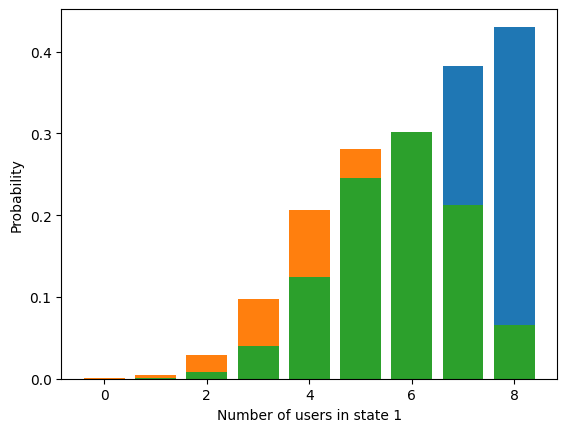

In [ ]:
# Expected value of the distribution over time steps O

O = 3
s = [0,0,0,0,0,0,0,0]
probs_after_steps = []
def prediction_of_activity(s, A, O):
    for o in range(O):
        # Compute the transition matrix after o time steps
        Ao =jnp.linalg.matrix_power(A, o+1)

        # Extract the transition probabilities
        alpha = Ao[0,1]
        beta = Ao[1,0]

        # 1. compute p_i for each chain
        p = [ s[i]*(1-beta) + (1-s[i])*alpha for i in range(8) ]

        # 2. init DP array
        f = [0]*9
        f[0] = 1.0
        
        # 3. iterate chains
        for pi in p:
            # update from k=8 down to 0
            for k in range(8, -1, -1):
                stay_off = f[k] * (1 - pi)
                turn_on  = f[k-1] * pi if k > 0 else 0
                f[k] = stay_off + turn_on

            # now f[k] is Pr{ exactly k chains are on }
            probs_after_steps.append(f)

    return probs_after_steps, 

plt.xlabel('Number of users in state 1')
plt.ylabel('Probability')

probs_after_steps = jnp.array(probs_after_steps)
print(probs_after_steps)

# Now lets calculate the expected value of the distribution for each time step
expected_value = jnp.zeros((probs_after_steps.shape[0]))
for i in range(probs_after_steps.shape[0]):
    expected_value = expected_value.at[i].set(jnp.sum(jnp.arange(probs_after_steps.shape[1])*probs_after_steps[i]))
    print(expected_value)

print(jnp.mean(expected_value))

# Now lets calculate the mode and the mean of the modes
mode = jnp.zeros((probs_after_steps.shape[0]))
for i in range(probs_after_steps.shape[0]):
    mode = mode.at[i].set(jnp.argmax(probs_after_steps[i]))
    print(mode)
print(jnp.mean(mode))

(array([0.00285714, 0.00214286, 0.01      , 0.00428571, 0.005     ,
        0.01857143, 0.01071429, 0.03214286, 0.01928571, 0.02714286,
        0.07214286, 0.03714286, 0.07428571, 0.04      , 0.03928571,
        0.08285714, 0.02642857, 0.06357143, 0.02785714, 0.025     ,
        0.04071429, 0.01      , 0.015     , 0.00428571, 0.00357143,
        0.01142857, 0.00285714, 0.00142857, 0.00142857, 0.00285714]),
 array([30. , 31.4, 32.8, 34.2, 35.6, 37. , 38.4, 39.8, 41.2, 42.6, 44. ,
        45.4, 46.8, 48.2, 49.6, 51. , 52.4, 53.8, 55.2, 56.6, 58. , 59.4,
        60.8, 62.2, 63.6, 65. , 66.4, 67.8, 69.2, 70.6, 72. ]),
 <BarContainer object of 30 artists>)

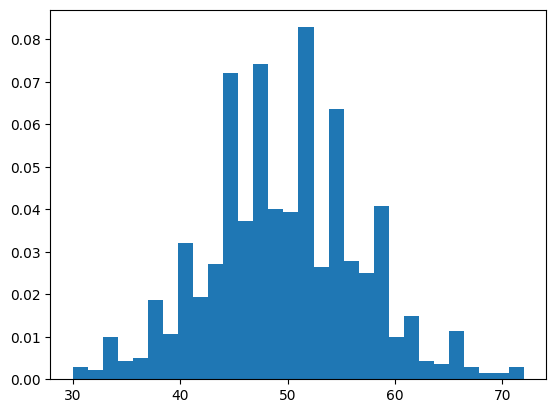

In [17]:
# Poisson distribution
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
poisson_samples = jax.random.poisson(subkey, lam=50, shape=(1000,))
plt.hist(poisson_samples, bins=30, density=True)

[[1.00000177e-08 7.20001140e-07 2.26800294e-05 4.08240448e-04
  4.59270366e-03 3.30674574e-02 1.48803517e-01 3.82637531e-01
  4.30467129e-01]
 [3.51247989e-04 4.78456728e-03 2.85134334e-02 9.70997959e-02
  2.06665099e-01 2.81511396e-01 2.39665076e-01 1.16593823e-01
  2.48155762e-02]
 [4.86611534e-05 9.57732438e-04 8.24677292e-03 4.05775532e-02
  1.24786526e-01 2.45600656e-01 3.02114338e-01 2.12361157e-01
  6.53065741e-02]]
[7.2 0.  0. ]
[7.2  5.04 0.  ]
[7.2       5.04      5.6879997]
5.976
[8. 0. 0.]
[8. 5. 0.]
[8. 5. 6.]
6.3333335


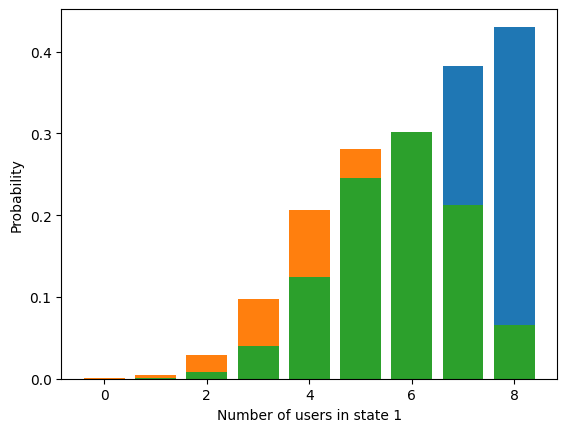

In [ ]:
# Expected value of the distribution over time steps O

O = 3
s = [0,0,0,0,0,0,0,0]
probs_after_steps = []
def prediction_of_activity(s, A, O):
    for o in range(O):
        # Compute the transition matrix after o time steps
        Ao =jnp.linalg.matrix_power(A, o+1)

        # Extract the transition probabilities
        alpha = Ao[0,1]
        beta = Ao[1,0]

        # 1. compute p_i for each chain
        p = [ s[i]*(1-beta) + (1-s[i])*alpha for i in range(8) ]

        # 2. init DP array
        f = [0]*9
        f[0] = 1.0
        
        # 3. iterate chains
        for pi in p:
            # update from k=8 down to 0
            for k in range(8, -1, -1):
                stay_off = f[k] * (1 - pi)
                turn_on  = f[k-1] * pi if k > 0 else 0
                f[k] = stay_off + turn_on

            # now f[k] is Pr{ exactly k chains are on }
            probs_after_steps.append(f)

    return probs_after_steps, 

plt.xlabel('Number of users in state 1')
plt.ylabel('Probability')

probs_after_steps = jnp.array(probs_after_steps)
print(probs_after_steps)

# Now lets calculate the expected value of the distribution for each time step
expected_value = jnp.zeros((probs_after_steps.shape[0]))
for i in range(probs_after_steps.shape[0]):
    expected_value = expected_value.at[i].set(jnp.sum(jnp.arange(probs_after_steps.shape[1])*probs_after_steps[i]))
    print(expected_value)

print(jnp.mean(expected_value))

# Now lets calculate the mode and the mean of the modes
mode = jnp.zeros((probs_after_steps.shape[0]))
for i in range(probs_after_steps.shape[0]):
    mode = mode.at[i].set(jnp.argmax(probs_after_steps[i]))
    print(mode)
print(jnp.mean(mode))

(array([0.00285714, 0.00214286, 0.01      , 0.00428571, 0.005     ,
        0.01857143, 0.01071429, 0.03214286, 0.01928571, 0.02714286,
        0.07214286, 0.03714286, 0.07428571, 0.04      , 0.03928571,
        0.08285714, 0.02642857, 0.06357143, 0.02785714, 0.025     ,
        0.04071429, 0.01      , 0.015     , 0.00428571, 0.00357143,
        0.01142857, 0.00285714, 0.00142857, 0.00142857, 0.00285714]),
 array([30. , 31.4, 32.8, 34.2, 35.6, 37. , 38.4, 39.8, 41.2, 42.6, 44. ,
        45.4, 46.8, 48.2, 49.6, 51. , 52.4, 53.8, 55.2, 56.6, 58. , 59.4,
        60.8, 62.2, 63.6, 65. , 66.4, 67.8, 69.2, 70.6, 72. ]),
 <BarContainer object of 30 artists>)

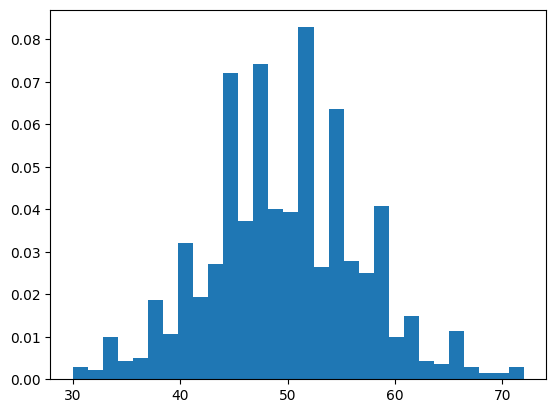

In [17]:
# Poisson distribution
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
poisson_samples = jax.random.poisson(subkey, lam=50, shape=(1000,))
plt.hist(poisson_samples, bins=30, density=True)